# Assignment: Linear Regression

Hi, students, in this assignment you will construct a Linear Regression model for a medical insurance dataset. Apply the knowledge of libraries we covered before (numpy, pandas, matplotlib, sklearn) to predict the insurance cost for the clients.

### Import the libraries



First of all, we import all the necessary libraries

Next we need to get the dataset

Run the 2 cells below to get it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/dimitlee/AITU_MLA_practice/main/Assignment/insurance.csv

--2024-01-24 10:29:55--  https://raw.githubusercontent.com/dimitlee/AITU_MLA_practice/main/Assignment/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54289 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2024-01-24 10:29:56 (4.67 MB/s) - ‘insurance.csv’ saved [54289/54289]



### Load dataset

Run the code cells above and check if insurance.csv appears in Files section of your notebook. You may need to wait for it to load. Then write your code in the cell below to load the dataset and print the first rows of the resulting dataframe.

In [3]:
# Load the dataset

df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Map object variables to integer values

Can you see, that the sex, smoker and region fields are non-integers? You can convert them to integer labels, (e.g. 1 for yes, 0 for no in smoker)

We do it using sklearn's LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## Data analysis

Output the basic info on the file, including the datatypes of the columns, and the numbers of records in each column

In [5]:
# Print the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


Get the list of columns in the dataset and save it to a variable, then print the list

In [6]:
# Get columns and print them

columns = list(df.columns)

print(columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


Output a histogram on charges column

<Axes: ylabel='Frequency'>

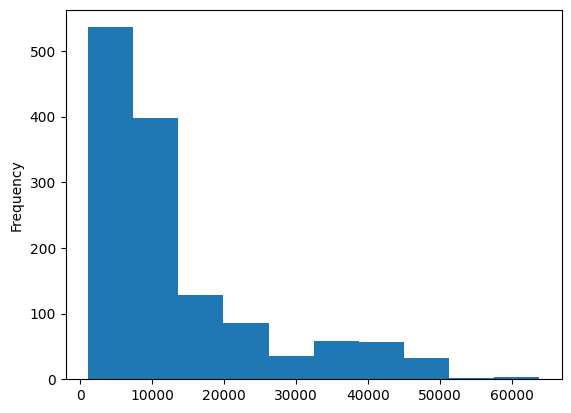

In [7]:
# Output a graph

df["charges"].plot.hist()

Output a heatmap of the correlation coefficients on columns of the dataset

<ipython-input-8-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

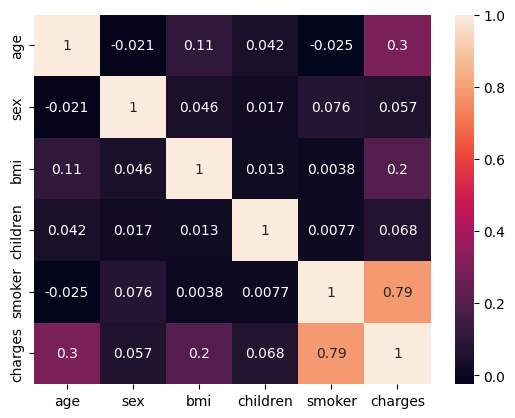

In [8]:
sns.heatmap(df.corr(), annot=True)

## Training the model

### Split into train and test datasets

Get the y and X values. Put the integer non-target columns into X and the target column into y. Use the list of columns we obtained earlier to get the data from corresponding columns into your X and y

In [9]:
# Get your X
X = df[columns[:-2]]
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [10]:
# Get your y
y = df[columns[-1]]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Now split the data into training and testing datasets with 30% of records in the dataset being in the testing dataset.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Run the cell below to check if dataset sizes are appropriate

In [13]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (936, 5)
Test feature set size: (402, 5)
Training variable set size: (936,)
Test variable set size: (402,)


Now train the model import LinearRegression from sklearn and fit it to your training data

In [14]:
# Fit the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Print the intercept and coefficients for the model

In [15]:
print(lm.intercept_)
print(lm.coef_)

-13239.108685768366
[  269.41604467   102.53351713   347.8408074    376.36162277
 23211.90474387]


Get the R-squared value by applying the model's predicted and actual values to R-squared function from sklearn

In [16]:
# Calculate r-squared values
from sklearn import metrics
y_pred = lm.predict(X_test)
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_pred),3))

R-squared value of predictions: 0.758
